<h4><b> 

1. Order Analysis

        What is the total number of orders in the dataset?
        How many orders are successfully delivered versus cancelled?
        What percentage of orders have been shipped vs cancelled or pending?
        How many orders are marked as "Shipped" vs "Cancelled" in terms of status?

2. Order Date & Time Analysis

        What is the distribution of order dates in the dataset? Are there any trends or spikes on specific dates?
        How many orders are placed per day or month?
        Are orders evenly distributed throughout the months, or are there certain months with higher sales?

3. Order Status & Fulfillment

        How many orders are fulfilled by Amazon vs merchant fulfillment?
        What is the most common fulfilment method? (Amazon or Merchant)
        How many orders are marked as “Cancelled”? What are the most common reasons, if available?

4. Sales Channel & Fulfilment

        What is the breakdown of orders by sales channel? (e.g., Amazon.in vs other platforms)
        What is the percentage of orders fulfilled by different channels (e.g., Easy Ship, Merchant)?

5. Order Quantity and Amount

        What is the distribution of order quantities (Qty)? Are orders mostly of one item, or multiple items?
        What is the average amount spent per order? What is the total revenue from all orders?
        Are there any outliers in the order amounts (i.e., unusually high or low value orders)?

6. Courier Analysis

        Which courier services are used the most for shipment?
        What is the status of the couriers for each order (Shipped vs Pending)?

7. Geographical Analysis

        What is the distribution of orders across different cities and states?
        Which cities or states have the highest number of orders?
        How does the order volume vary by region (e.g., state or city)?
        Are there any significant trends in shipping based on location (e.g., higher cancellations in specific areas)?

8. Product Information

        Which product styles (SKU, ASIN) are the most frequently sold?
        What is the most common size ordered?
        Which product categories have the highest sales volume?
        What is the breakdown of sales by product category?

9. Promotions and Discounts

        How many orders used promotions (based on promotion-ids)?
        What is the impact of promotions on the number of orders or order value?

10. B2B Orders

        How many of the orders are marked as B2B (Business-to-Business)?
        What percentage of orders are B2B vs B2C?

11. Currency & Pricing

        Is there any fluctuation in the pricing (Amount) of orders in different cities or states?
        What currency is being used for the transactions, and are there any noticeable exchange rate effects?

12. Shipping Service Level

        What shipping service levels are used the most (e.g., Standard, Expedited)?
        Does the shipping service level affect the delivery time or cancellation rate?

13. Fulfillment Analysis

        How many orders are fulfilled by Easy Ship vs other fulfillment methods?
        Does Easy Ship have a higher cancellation rate compared to other fulfillment methods?

14. Cancellation Analysis

        What are the most common reasons for cancellations, if data is available?
        Are cancellations more common with specific SKUs, styles, or categories?
        What percentage of orders were cancelled after shipping vs before?
</b></h4>

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [125]:
path = r"C:\Users\gagan\Desktop\Mission Robosoft\Datasets\Amazon Sale Report 1.csv"
df = pd.read_csv(path)

In [126]:
df.iloc[:, :10].head(3)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta


In [127]:
df.iloc[:, 10:20].head(3)

,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country
0,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN
1,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN
2,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN


In [128]:
df.iloc[:, 20:30].head(3)

,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,NaN,False,Easy Ship,NaN
1,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN


In [129]:
df.shape

(128975, 24)

In [130]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [131]:
df.describe(include = 'object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by,Unnamed: 22
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,39277,79925
unique,120378,91,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1,1
top,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,39277,79925


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [133]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [134]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
#cols_to_be_transformed = ['Courier Status', 'currency', 'ship-city', 'ship-state', 'promotion-ids', 'ship-country', 'fulfilled-by', 'Unnamed: 22']
cols_to_be_transformed = df.select_dtypes(include = 'object')
for i in cols_to_be_transformed:
    df[[i]] = imputer.fit_transform(df[[i]])

In [135]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean', missing_values = np.nan)
#cols_to_be_transformed = ['Courier Status', 'currency', 'ship-city', 'ship-state', 'promotion-ids', 'ship-country', 'fulfilled-by', 'Unnamed: 22']
cols_to_be_transformed = df.select_dtypes(include = 'number')
for i in cols_to_be_transformed:
    df[[i]] = imputer.fit_transform(df[[i]])

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  float64
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      128975 non-null  object 
 13  Qty                 128975 non-null  float64
 14  currency            128975 non-null  object 
 15  Amount              128975 non-nul

In [137]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
Unnamed: 22           0
dtype: int64

In [138]:
df.iloc[:, :10].head(3)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category
0,0.0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set
1,1.0,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta
2,2.0,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta


In [139]:
df.iloc[:, 10:20].head(3)


,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country
0,S,B09KXVBD7Z,Shipped,0.0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN
1,3XL,B09K3WFS32,Shipped,1.0,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN
2,XL,B07WV4JV4D,Shipped,1.0,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN


In [140]:
df.iloc[:, 20:30].head(3)

,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
1,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
2,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Easy Ship,False


In [141]:
#What is the total number of orders in the dataset?
df.shape[0]

128975

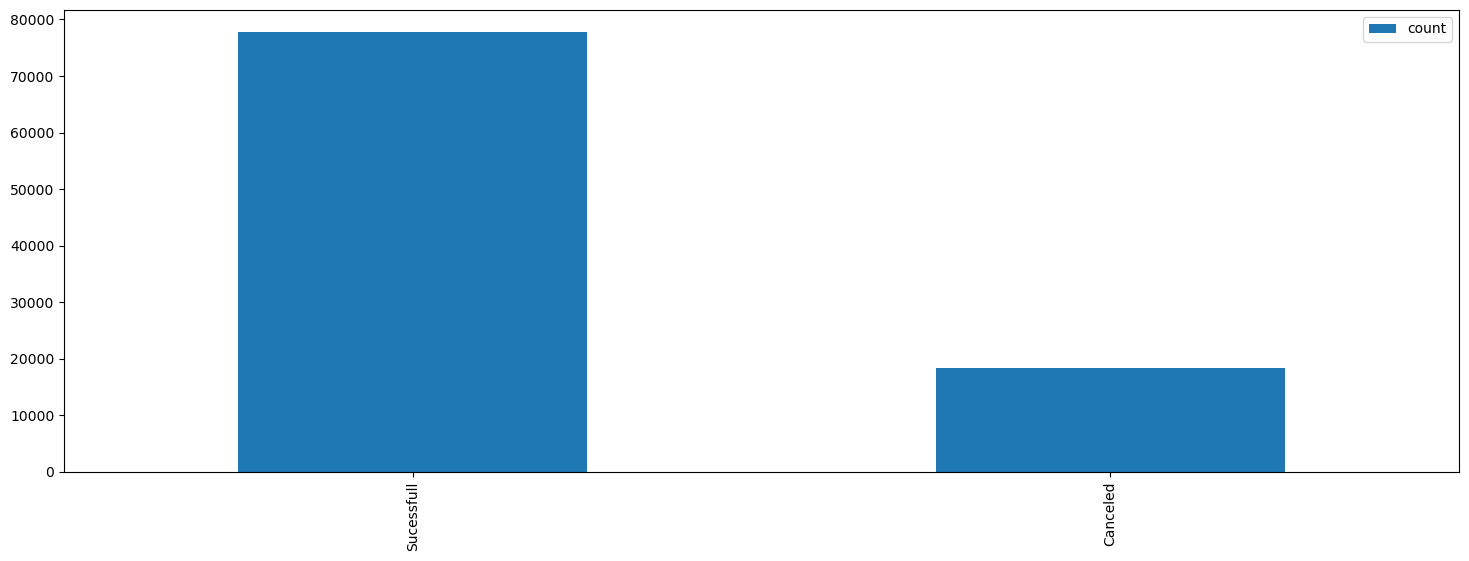

In [142]:
#How many orders are successfully delivered versus cancelled?
success_vs_canceled = df["Status"].value_counts().reset_index()

success_vs_canceled[(success_vs_canceled['Status'] == 'Shipped') | (success_vs_canceled['Status'] == 'Cancelled')].plot(kind = "bar", figsize = (18, 6))
plt.xticks(ticks = [0, 1], labels = ['Sucessfull', 'Canceled'])
plt.show()

In [143]:
#What percentage of orders have been shipped vs cancelled or pending?
success_vs_canceled = df["Status"].value_counts().reset_index()
total = success_vs_canceled['count'].sum()
success_vs_canceled['Percentage'] = (success_vs_canceled['count'] / total) * 100
success_vs_canceled[(success_vs_canceled['Status'] == 'Pending')]

,Status,count,Percentage
5,Pending,658,0.510176


In [144]:
#How many orders are marked as "Shipped" vs "Cancelled" in terms of status?
success_vs_canceled[(success_vs_canceled['Status'] == 'Shipped') | (success_vs_canceled['Status'] == 'Cancelled')]

,Status,count,Percentage
0,Shipped,77804,60.324869
2,Cancelled,18332,14.213607


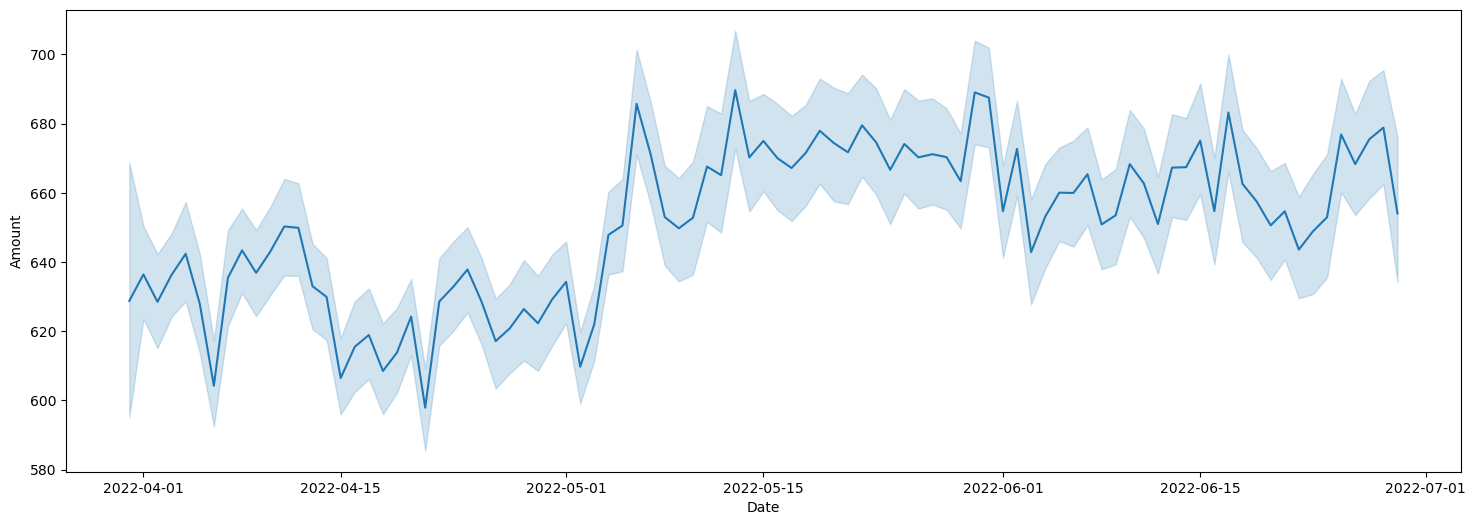

In [145]:
#What is the distribution of order dates in the dataset? Are there any trends or spikes on specific dates?
plt.figure(figsize = (18, 6))
df['Date'] = pd.to_datetime(df['Date'])
sns.lineplot(y = df['Amount'], x = df['Date'])
plt.show()

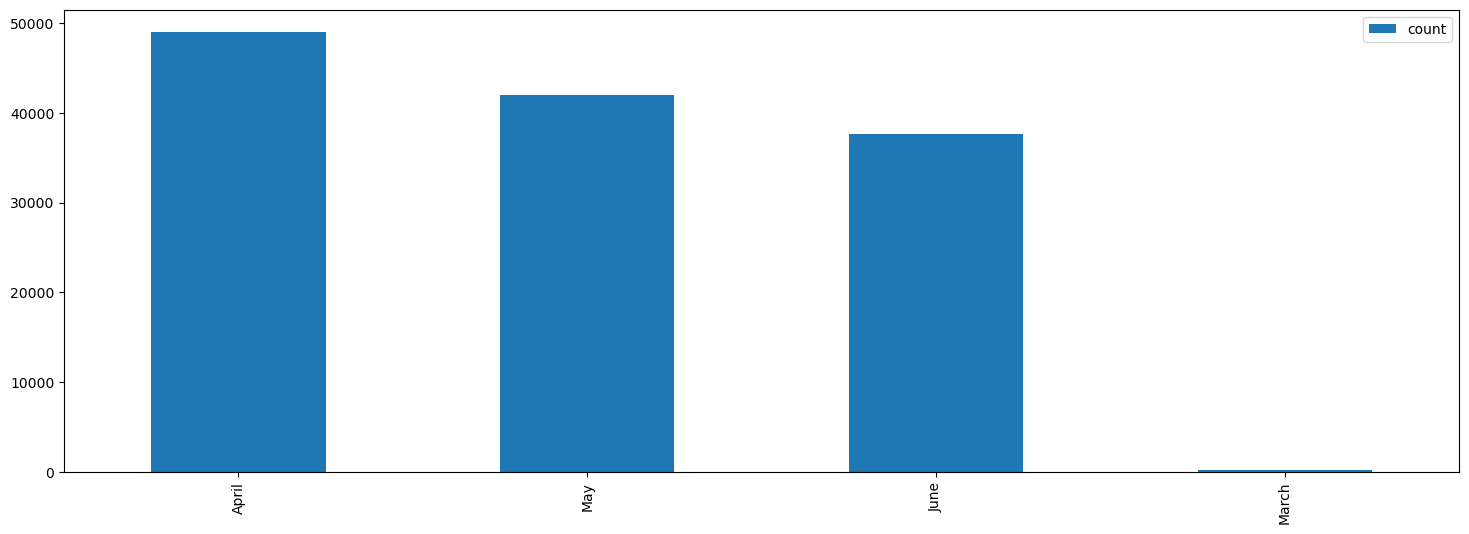

In [146]:
#How many orders are placed per day or month?
def transform(val):
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    return months[val - 1]
df['Month'] = df['Date'].dt.month_name()
order_by_month = df['Month'].value_counts().reset_index()
#order_by_months = order_by_month['Month'].apply(transform).reset_index()
#order_by_month['Month'] = order_by_months['Month']
order_by_month.plot(kind = "bar", figsize = (18, 6))
plt.xticks(ticks = [0, 1, 2, 3], labels = ["April", "May", "June", "March"])
plt.show()

In [147]:
#How many orders are placed per day or month?
def transform(val):
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    return months[val - 1]
df['Day'] = df['Date'].dt.day_name()
order_by_day = df['Day'].value_counts().reset_index()

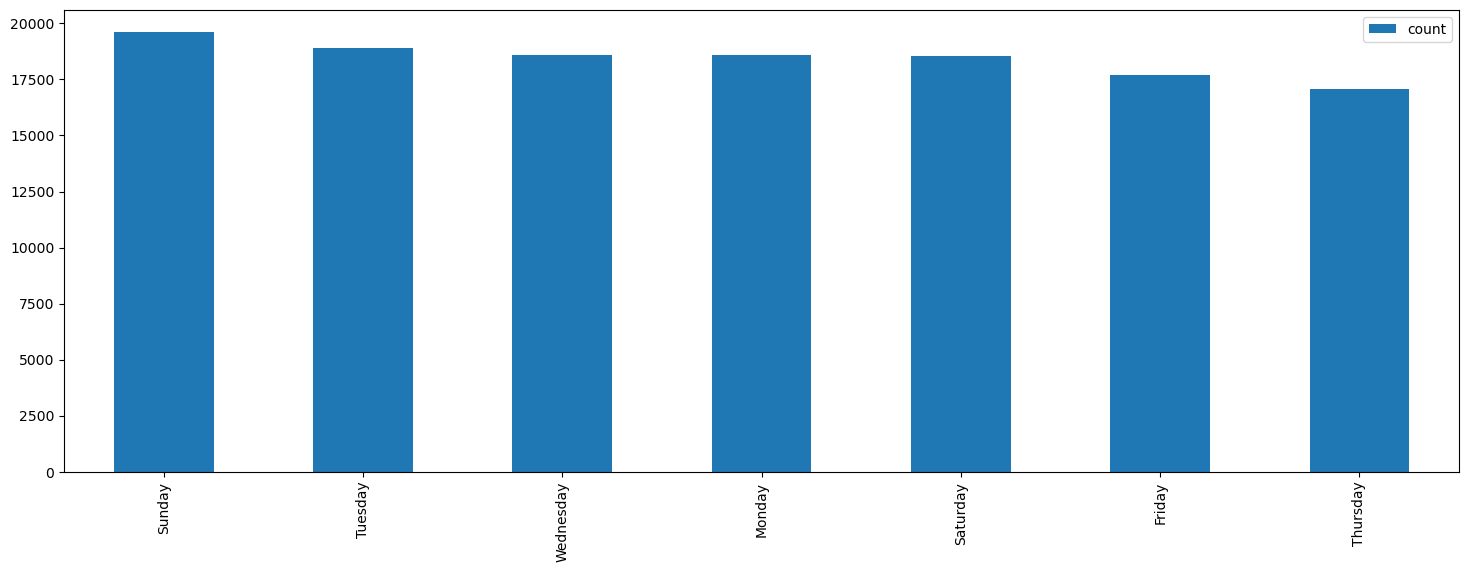

In [148]:
order_by_day.plot(kind = "bar", figsize = (18, 6))
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6], labels = ["Sunday", "Tuesday", "Wednesday", "Monday", "Saturday", "Friday", "Thursday"])
plt.show()

<Axes: ylabel='Frequency'>

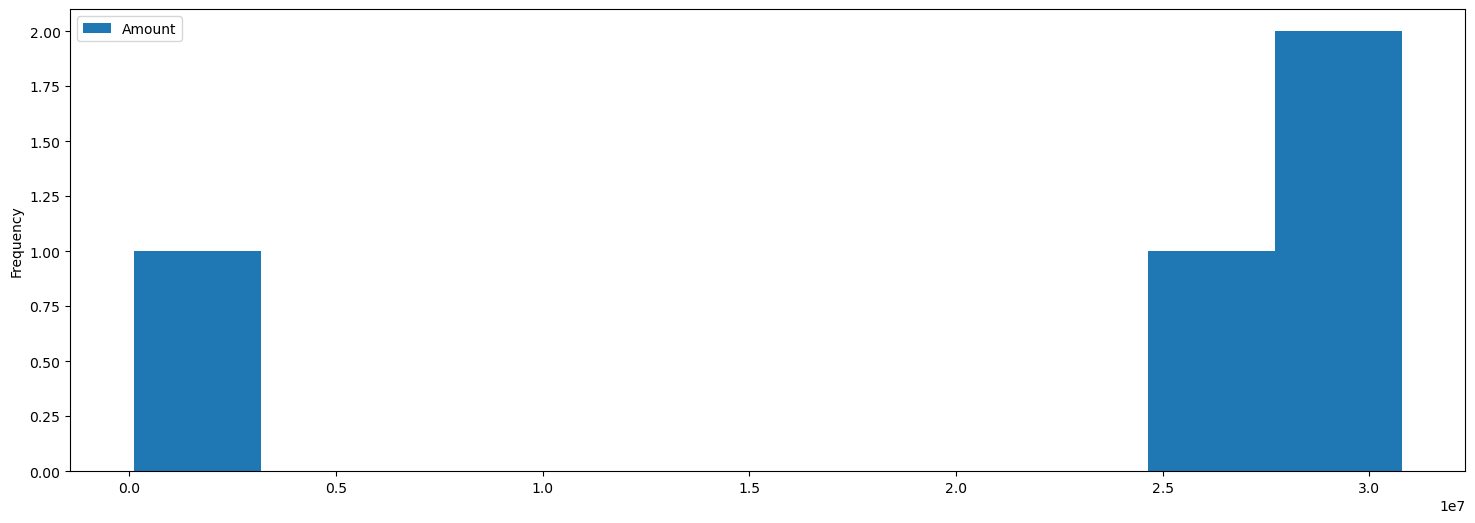

In [186]:
#Are orders evenly distributed throughout the months, or are there certain months with higher sales
df.groupby('Month')['Amount'].sum().astype(int).reset_index().plot(kind = "hist", figsize = (18, 6))

In [150]:
mean_orders = df.groupby('Month')['Amount'].sum().astype(int).reset_index()['Amount'].mean()
std_dev_orders = df.groupby('Month')['Amount'].sum().astype(int).reset_index()['Amount'].std()
cv_orders = (std_dev_orders / mean_orders) * 100
print(f'Mean: {mean_orders:.2f}')
print(f'Standard Deviation: {std_dev_orders:.2f}')
print(f'Coefficient of Variation: {cv_orders:.2f}%')

Mean: 20912053.25
Standard Deviation: 14075699.74
Coefficient of Variation: 67.31%


In [151]:
#How many orders are fulfilled by Amazon vs merchant fulfillment?
orders_fullfilled = df.groupby(['Fulfilment', 'Courier Status'])['Amount'].count().reset_index()
orders_fullfilled[(orders_fullfilled['Courier Status'] == 'Shipped')]

,Fulfilment,Courier Status,Amount
1,Amazon,Shipped,77606
3,Merchant,Shipped,38753


In [152]:
#What is the most common fulfilment method? (Amazon or Merchant)
df['Fulfilment'].value_counts().reset_index()

,Fulfilment,count
0,Amazon,89698
1,Merchant,39277


In [153]:
df['Category'].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [154]:
#How many orders are marked as “Cancelled”? What are the most common reasons, if available?
cancelled_df = df[(df['Courier Status'] == "Cancelled")]

In [155]:
cancelled_df['Category'].value_counts()

Category
Set              2510
kurta            2469
Western Dress     487
Top               363
Ethnic Dress       52
Blouse             35
Bottom             11
Saree               8
Name: count, dtype: int64

In [156]:
#What is the breakdown of orders by sales channel? (e.g., Amazon.in vs other platforms)
df['Sales Channel '].value_counts()

Sales Channel 
Amazon.in     128851
Non-Amazon       124
Name: count, dtype: int64

In [157]:
#What is the percentage of orders fulfilled by different channels (e.g., Easy Ship, Merchant)?
orders_fulfilled_by = df.groupby(['Sales Channel ', 'fulfilled-by'])['Amount'].count().reset_index()
total = orders_fulfilled_by['Amount'].sum()

In [158]:
orders_fulfilled_by['percentage'] = (orders_fulfilled_by['Amount'] / total) * 100
orders_fulfilled_by

,Sales Channel,fulfilled-by,Amount,percentage
0,Amazon.in,Easy Ship,128851,99.903857
1,Non-Amazon,Easy Ship,124,0.096143


In [159]:
#What is the distribution of order quantities (Qty)? Are orders mostly of one item, or multiple items?
df['Qty'].value_counts()

Qty
1.0     115780
0.0      12807
2.0        341
3.0         32
4.0          9
5.0          2
15.0         1
9.0          1
13.0         1
8.0          1
Name: count, dtype: int64

In [160]:
#What is the average amount spent per order? What is the total revenue from all orders?
df.groupby('Category')['Amount'].mean().reset_index()

,Category,Amount
0,Blouse,526.558797
1,Bottom,371.907294
2,Dupatta,305.000000
3,Ethnic Dress,719.605450
4,Saree,791.285446
5,Set,821.469261
6,Top,531.367435
7,Western Dress,756.924362
8,kurta,468.131622


In [161]:
round(df.groupby('Category')['Amount'].sum().reset_index()['Amount'].sum(), 2)

83648214.92

In [162]:
#Which courier services are used the most for shipment?
df['Sales Channel '].value_counts()

Sales Channel 
Amazon.in     128851
Non-Amazon       124
Name: count, dtype: int64

In [163]:
#What is the status of the couriers for each order (Shipped vs Pending)?
status_df = df[(df['Status'] == 'Shipped') | (df['Status'] == 'Pending')]
status_df.groupby('Status')['Category'].count().reset_index()

,Status,Category
0,Pending,658
1,Shipped,77804


<Axes: xlabel='Style'>

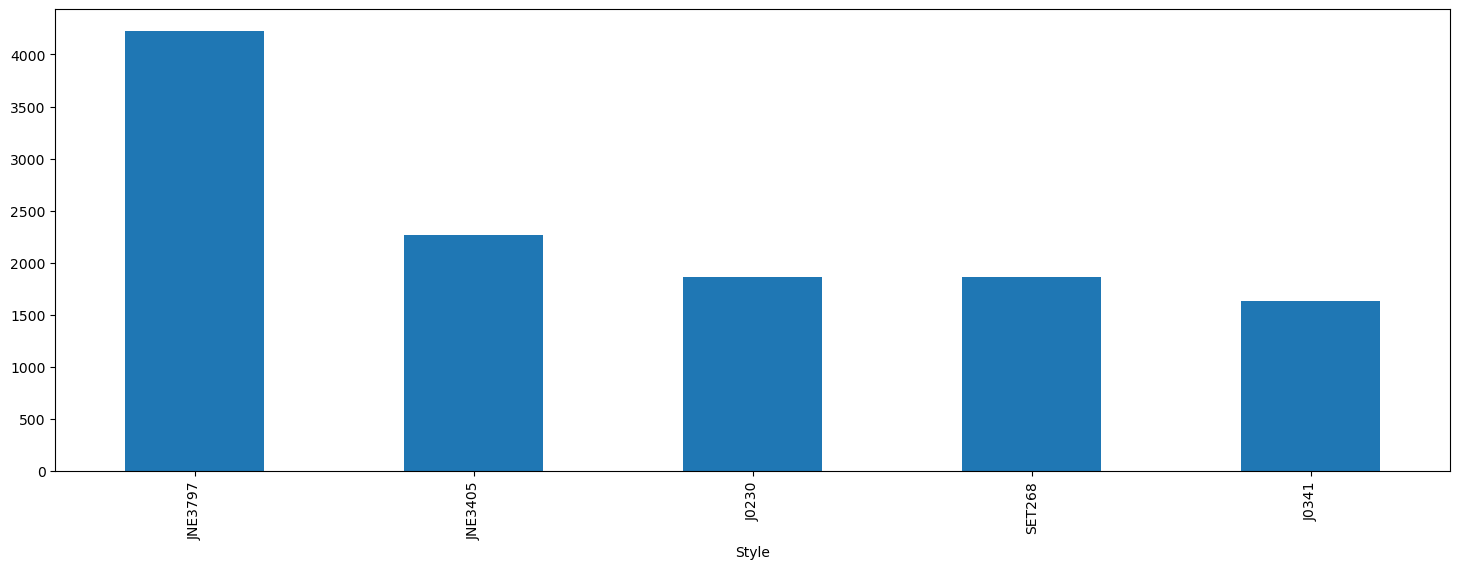

In [164]:
#Which product styles (SKU, ASIN) are the most frequently sold
df.groupby('Style')['Amount'].count().sort_values(ascending = False)[:5].plot(kind = 'bar', figsize = (18, 6))

<Axes: xlabel='Size'>

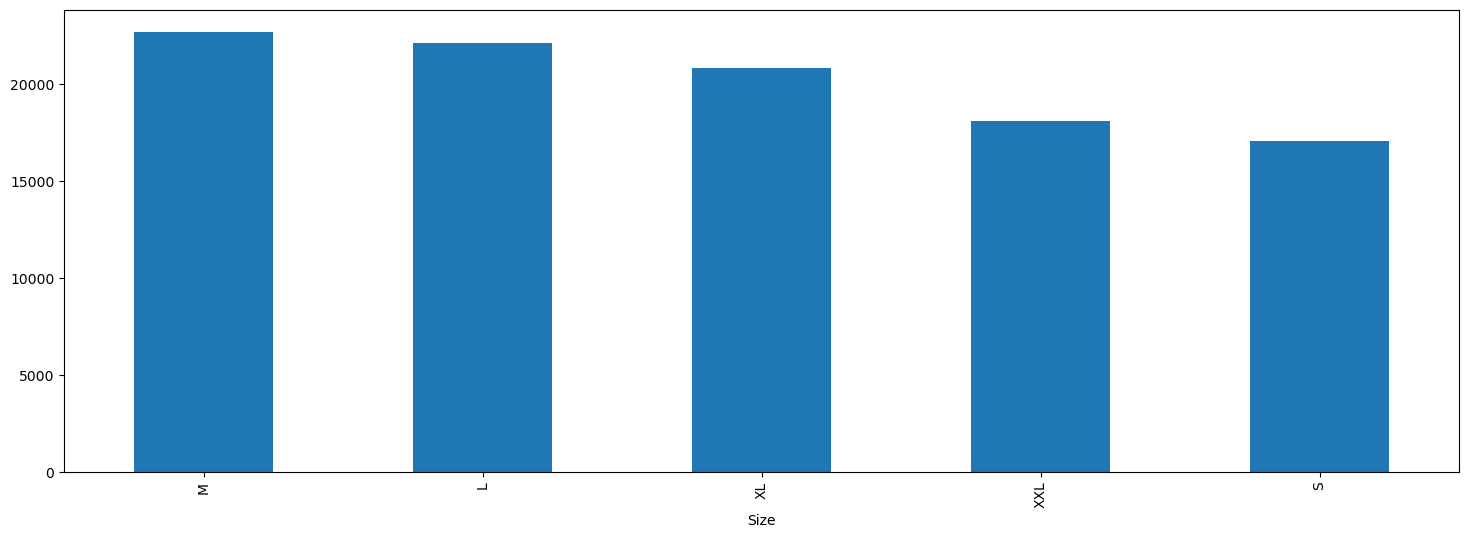

In [165]:
#What is the most common size ordered
df.groupby('Size')['Amount'].count().sort_values(ascending = False)[:5].plot(kind = 'bar', figsize = (18, 6))

<Axes: xlabel='Category'>

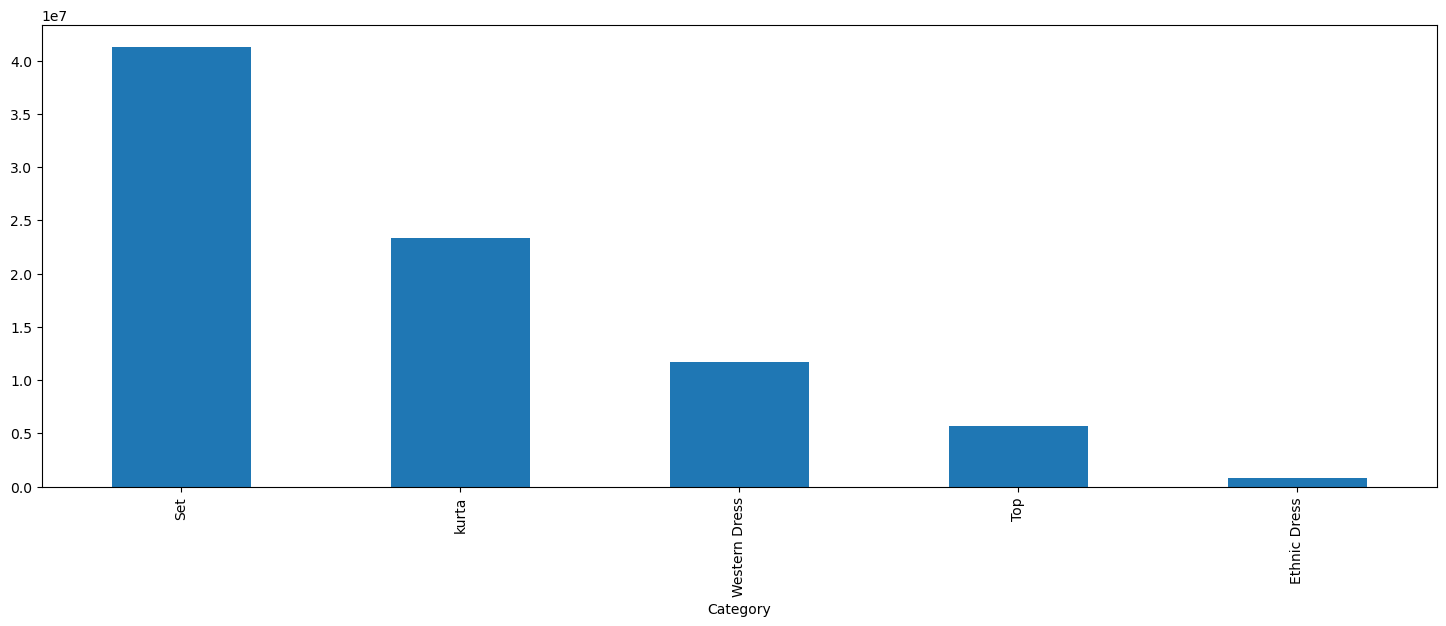

In [166]:
#Which product categories have the highest sales volume
df.groupby('Category')['Amount'].sum().sort_values(ascending = False).astype(int)[:5].plot(kind = 'bar', figsize = (18, 6))

<Axes: xlabel='Category'>

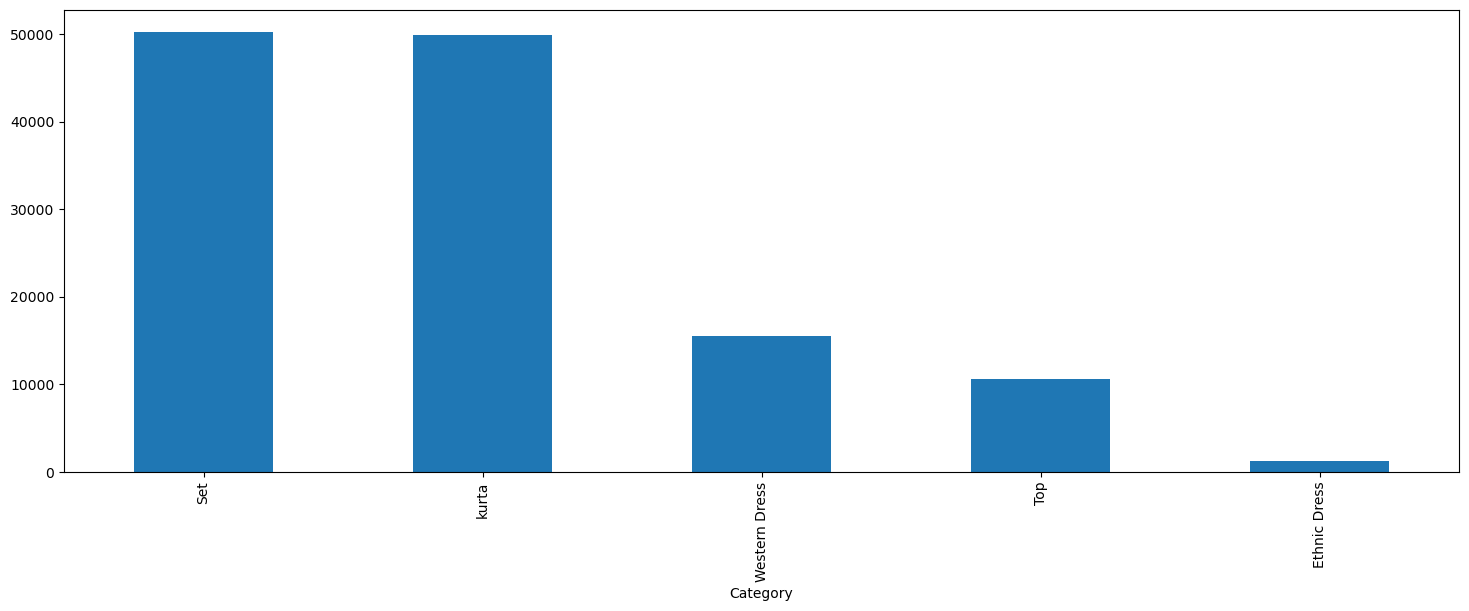

In [167]:
#What is the breakdown of sales by product category
df.groupby('Category')['Amount'].count().sort_values(ascending = False)[:5].plot(kind = 'bar', figsize = (18, 6))

<Axes: xlabel='promotion-ids-shorten'>

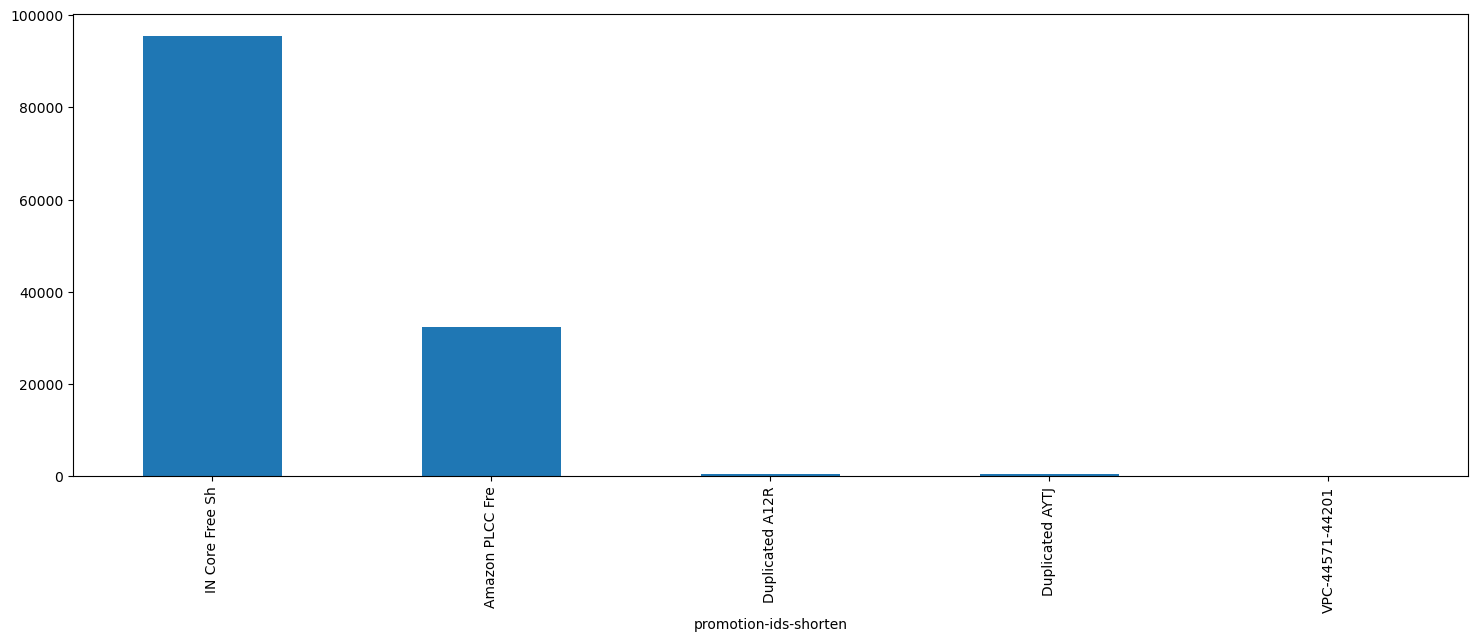

In [168]:
#How many orders used promotions (based on promotion-ids)?
def transform(val):
    return val[:15]
df['promotion-ids-shorten'] = df['promotion-ids'].apply(transform)
df.groupby('promotion-ids-shorten')['Amount'].count().sort_values(ascending = False)[:5].plot(kind = 'bar', figsize = (18, 6))


<Axes: xlabel='promotion-ids-shorten,Date'>

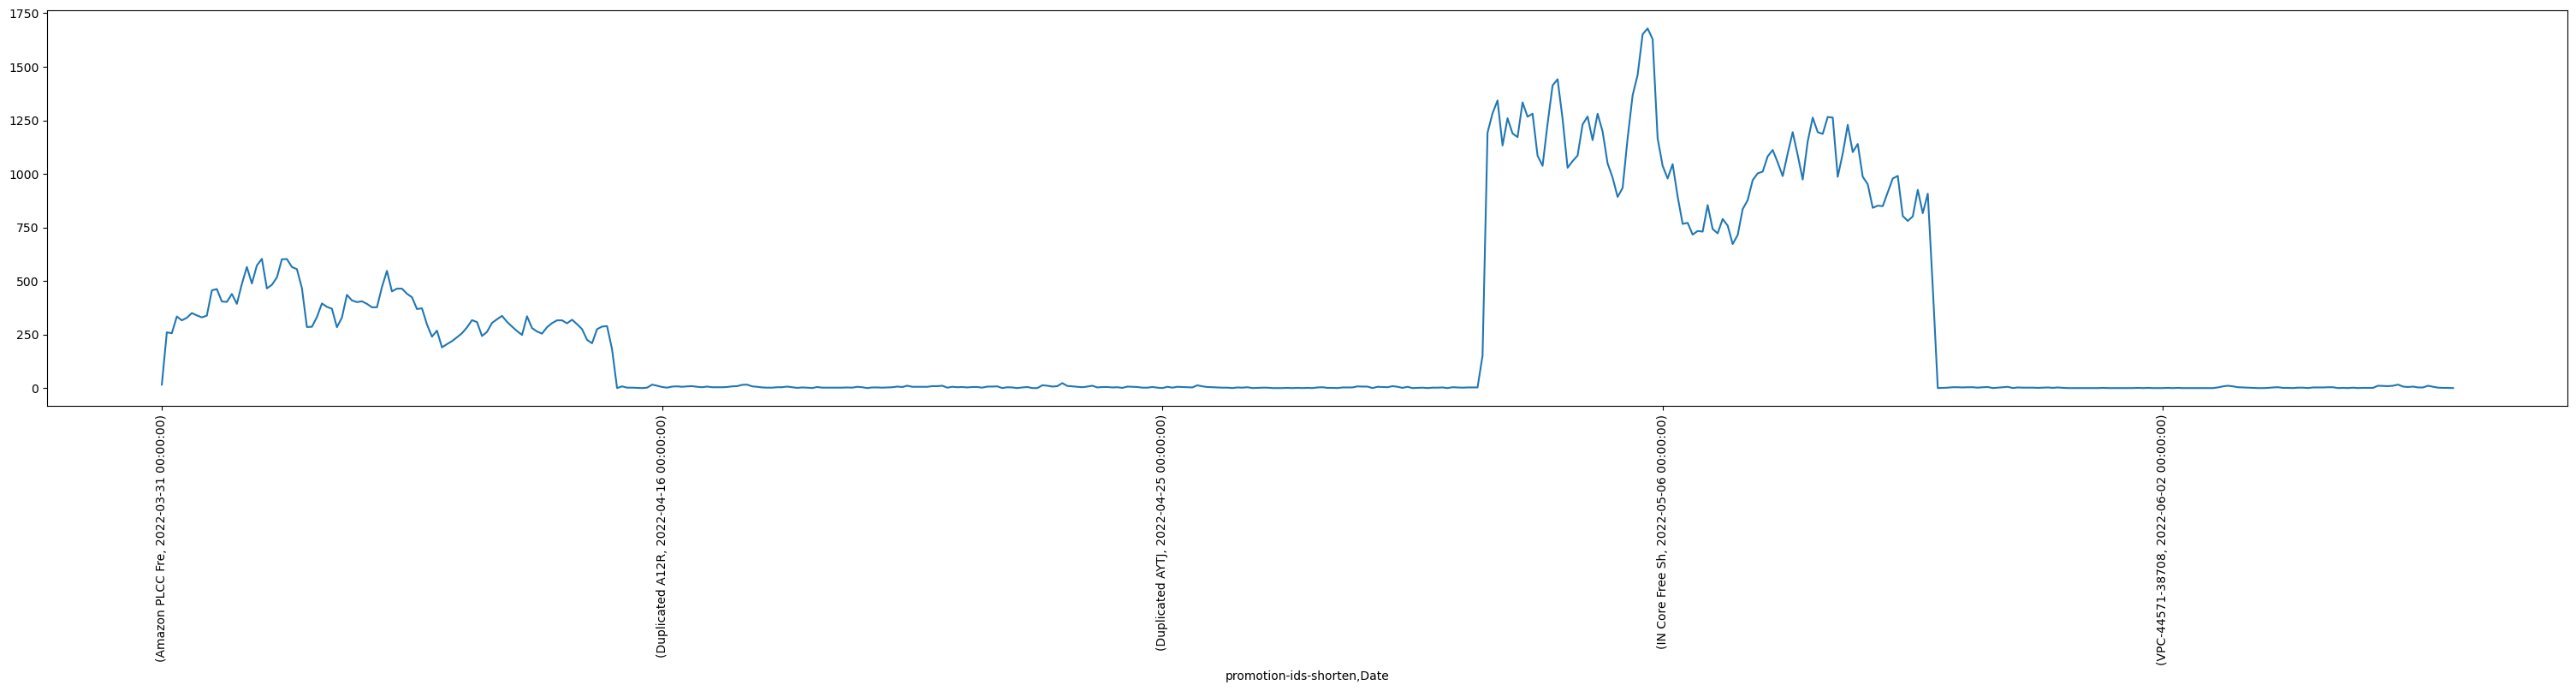

In [169]:
#What is the impact of promotions on the number of orders or order value?
df.groupby(['promotion-ids-shorten', 'Date'])['Amount'].count().plot(kind = 'line', figsize = (38, 6), rot = 90)

<Axes: xlabel='B2B'>

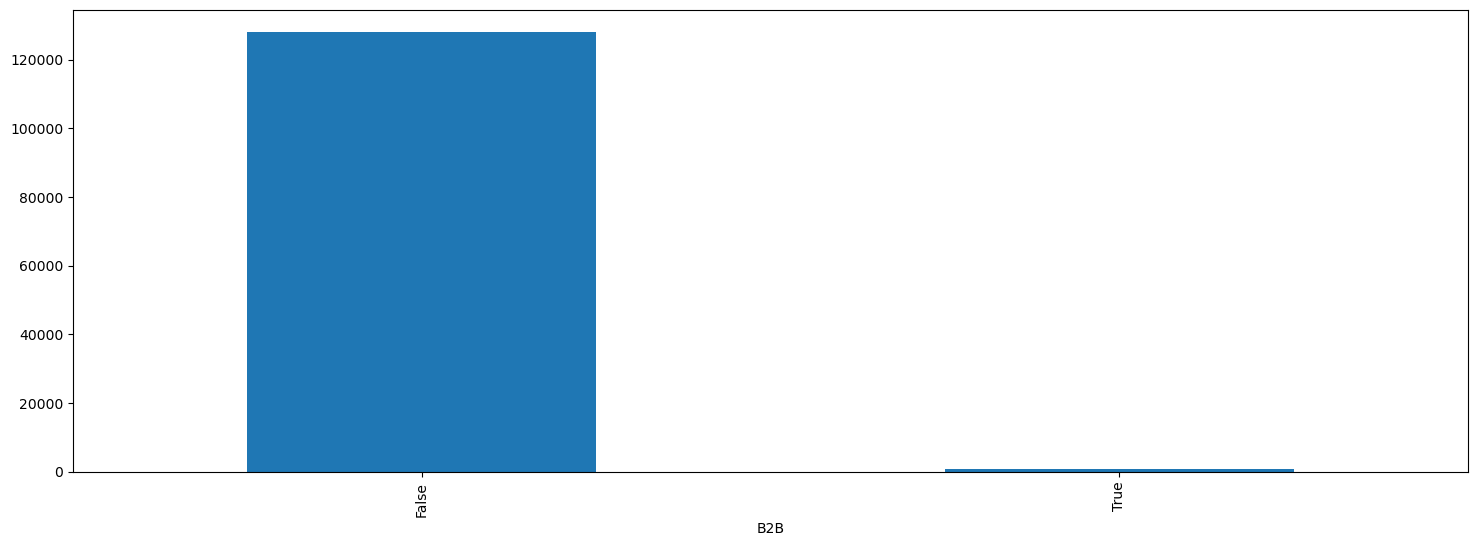

In [170]:
#How many of the orders are marked as B2B (Business-to-Business)?
df['B2B'].value_counts().plot(kind = 'bar', figsize = (18, 6))

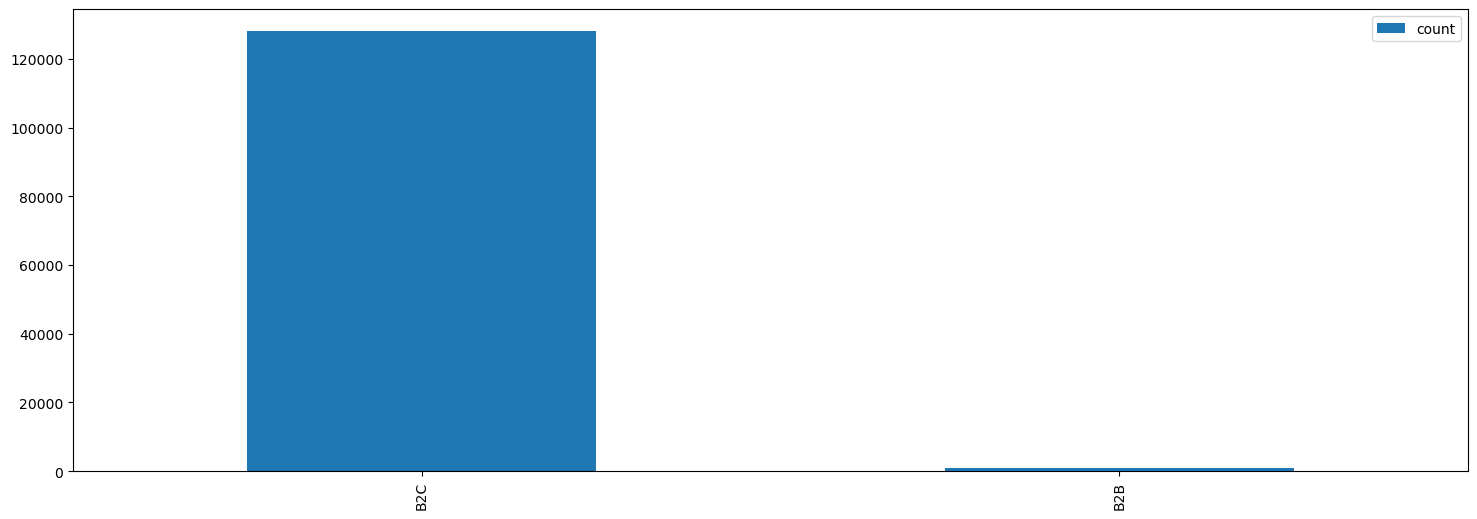

In [171]:
#What percentage of orders are B2B vs B2C?
percentage_B2C = df['B2B'].value_counts().reset_index()
percentage_B2C['Percentage'] = percentage_B2C['count'] / percentage_B2C['count'].sum()
percentage_B2C['Category'] = percentage_B2C['B2B'].apply(lambda x : 'B2C' if x == False else 'B2B')
percentage_B2C.loc[:, ['Category', 'count']].plot(kind = 'bar', figsize = (18, 6))
plt.xticks(ticks = [0, 1], labels = ['B2C', 'B2B'])
plt.show()

<Axes: xlabel='Date'>

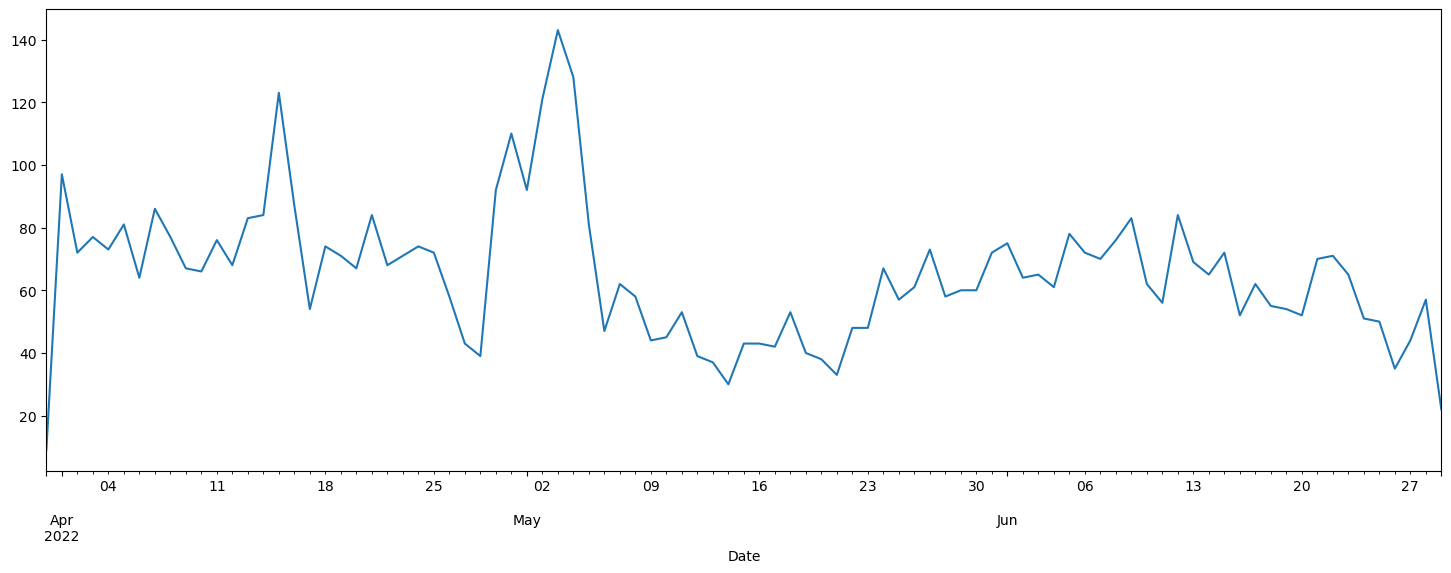

In [172]:
#What are the most common reasons for cancellations, if data is available?
cancelled_df.groupby('Date')['Amount'].count().plot(kind='line', figsize=(18, 6))


In [173]:
cancelled_df['ship-service-level'].value_counts()

ship-service-level
Expedited    5892
Standard       43
Name: count, dtype: int64

In [174]:
cancelled_df['Category'].value_counts()[:2]

Category
Set      2510
kurta    2469
Name: count, dtype: int64

In [175]:
cancelled_df['Size'].value_counts()[:2]

Size
M    1056
L     989
Name: count, dtype: int64

In [176]:
cancelled_df['Fulfilment'].value_counts()

Fulfilment
Amazon    5935
Name: count, dtype: int64

<Axes: xlabel='Category'>

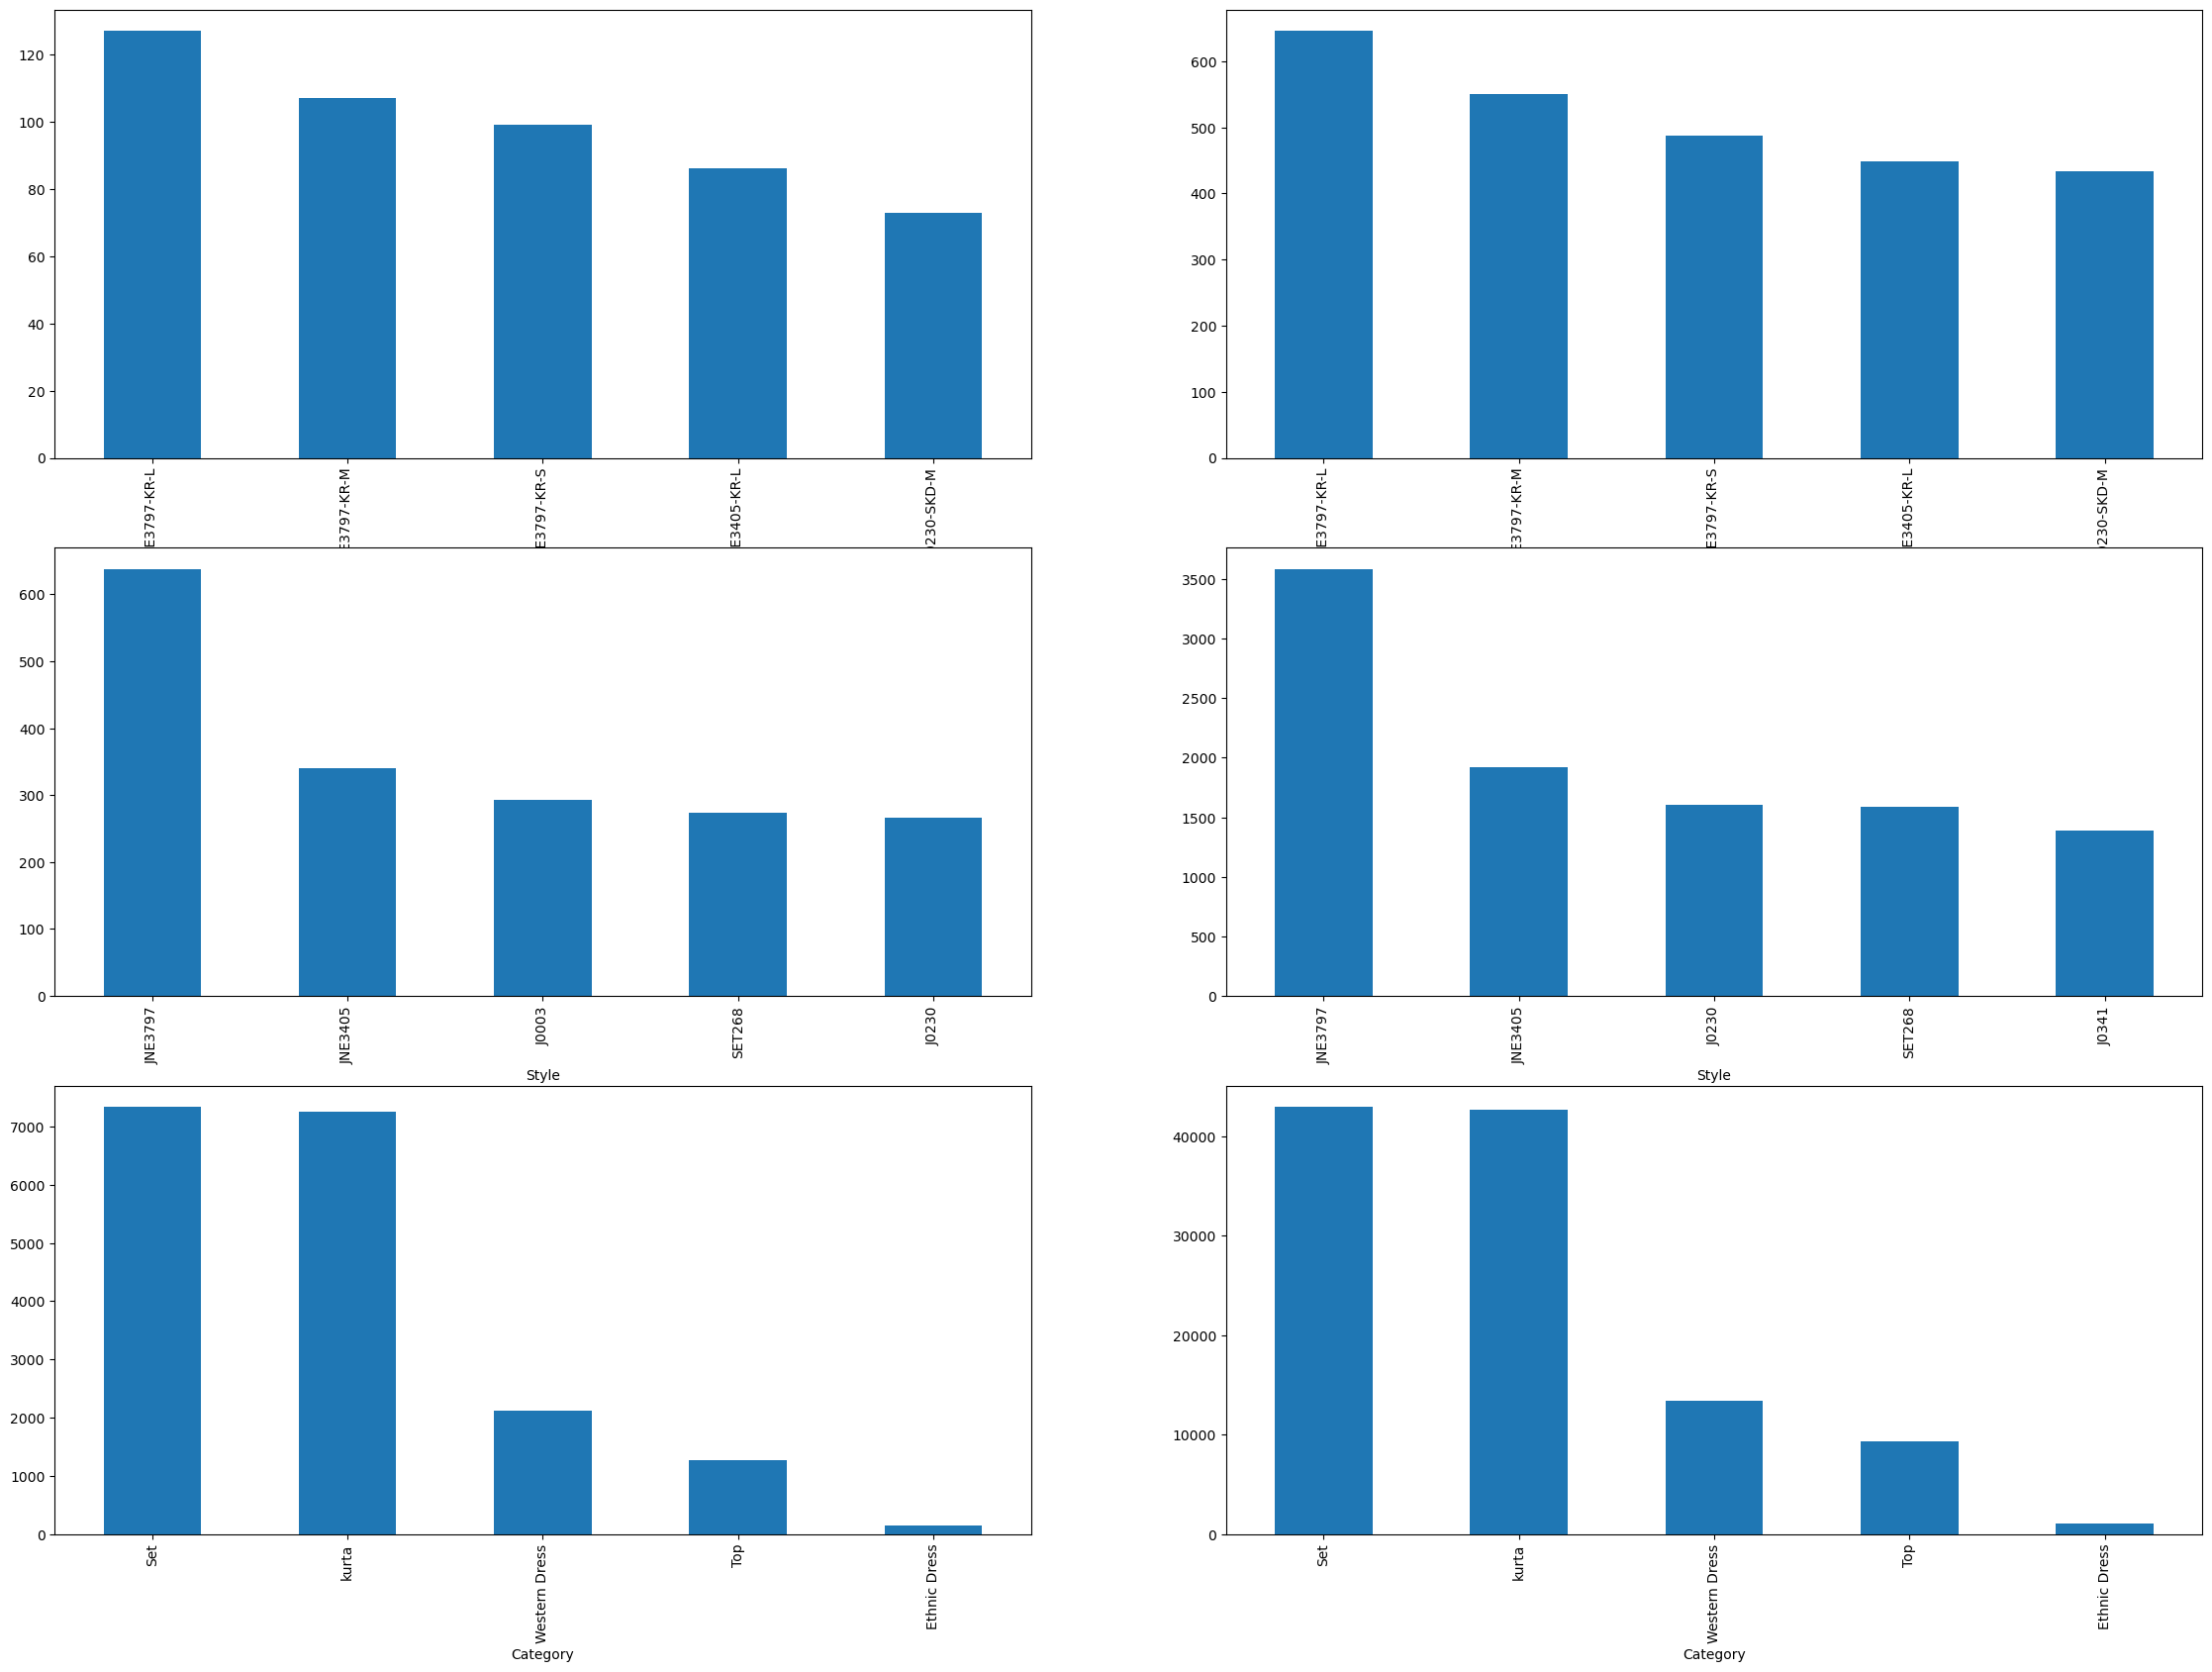

In [177]:
#Are cancellations more common with specific SKUs, styles, or categories?
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(28, 20))  
df[df['Status'] == 'Cancelled'].groupby('SKU')['Amount'].count().sort_values(ascending = False)[:5].plot(kind = 'bar', ax=axes[0, 0])
df[df['Status'] != 'Cancelled'].groupby('SKU')['Amount'].count().sort_values(ascending = False)[:5].plot(kind = 'bar', ax=axes[0, 1])
df[df['Status'] == 'Cancelled'].groupby('Style')['Amount'].count().sort_values(ascending = False)[:5].plot(kind = 'bar', ax=axes[1, 0])
df[df['Status'] != 'Cancelled'].groupby('Style')['Amount'].count().sort_values(ascending = False)[:5].plot(kind = 'bar', ax=axes[1, 1])
df[df['Status'] == 'Cancelled'].groupby('Category')['Amount'].count().sort_values(ascending = False)[:5].plot(kind = 'bar', ax=axes[2, 0])
df[df['Status'] != 'Cancelled'].groupby('Category')['Amount'].count().sort_values(ascending = False)[:5].plot(kind = 'bar', ax=axes[2, 1])


In [178]:
#What percentage of orders were cancelled after shipping vs before?
cancelled_shipping_vs_before = df[(df['Courier Status'] == 'Shipped') | (df['Status'] == 'Cancelled')]
cancelled_shipping_vs_before = cancelled_shipping_vs_before['Courier Status'].value_counts().reset_index()
cancelled_shipping_vs_before['Percentage'] = (cancelled_shipping_vs_before['count'] / cancelled_shipping_vs_before['count'].sum()) * 100
cancelled_shipping_vs_before[1:2]

,Courier Status,count,Percentage
1,Cancelled,5840,4.568568


In [179]:
cancelled_shipping_vs_before = df[(df['Status'] == 'Shipped') | (df['Status'] == 'Cancelled')]
cancelled_shipping_vs_before = cancelled_shipping_vs_before['Status'].value_counts().reset_index()
cancelled_shipping_vs_before['Percentage'] = (cancelled_shipping_vs_before['count'] / cancelled_shipping_vs_before['count'].sum()) * 100
cancelled_shipping_vs_before[-1:]

,Status,count,Percentage
1,Cancelled,18332,19.068819


In [180]:
#What is the distribution of orders across different cities and states
ditribution_of_orders = df.groupby(['ship-state', 'ship-city'])['Amount'].count() 
ditribution_of_orders 

ship-state          ship-city                             
ANDAMAN & NICOBAR   Andaman and nicobar islands port Blair     1
                    BAMBOOFLAT                                10
                    FERRARGUNJ                                10
                    GARACHARMA                                 1
                    GREAT NICOBAR                              3
                                                              ..
punjab              phagwara                                   1
rajasthan           jaipur                                     3
                    madanganj-kishangarh  ajmer                2
                    sriganganagar                              1
rajsthan            Bheem                                      1
Name: Amount, Length: 9149, dtype: int64

In [181]:
#Which cities or states have the highest number of orders? 
highest_number_orders = ditribution_of_orders.sort_values(ascending = False)
highest_number_orders 

ship-state      ship-city
KARNATAKA       BENGALURU    11217
TELANGANA       HYDERABAD     8065
MAHARASHTRA     MUMBAI        6126
DELHI           NEW DELHI     5785
TAMIL NADU      CHENNAI       5421
                             ...  
MADHYA PRADESH  Mauganj          1
                Mandsour         1
                Mandla           1
                MUNDI            1
rajsthan        Bheem            1
Name: Amount, Length: 9149, dtype: int64

<Axes: xlabel='ship-state'>

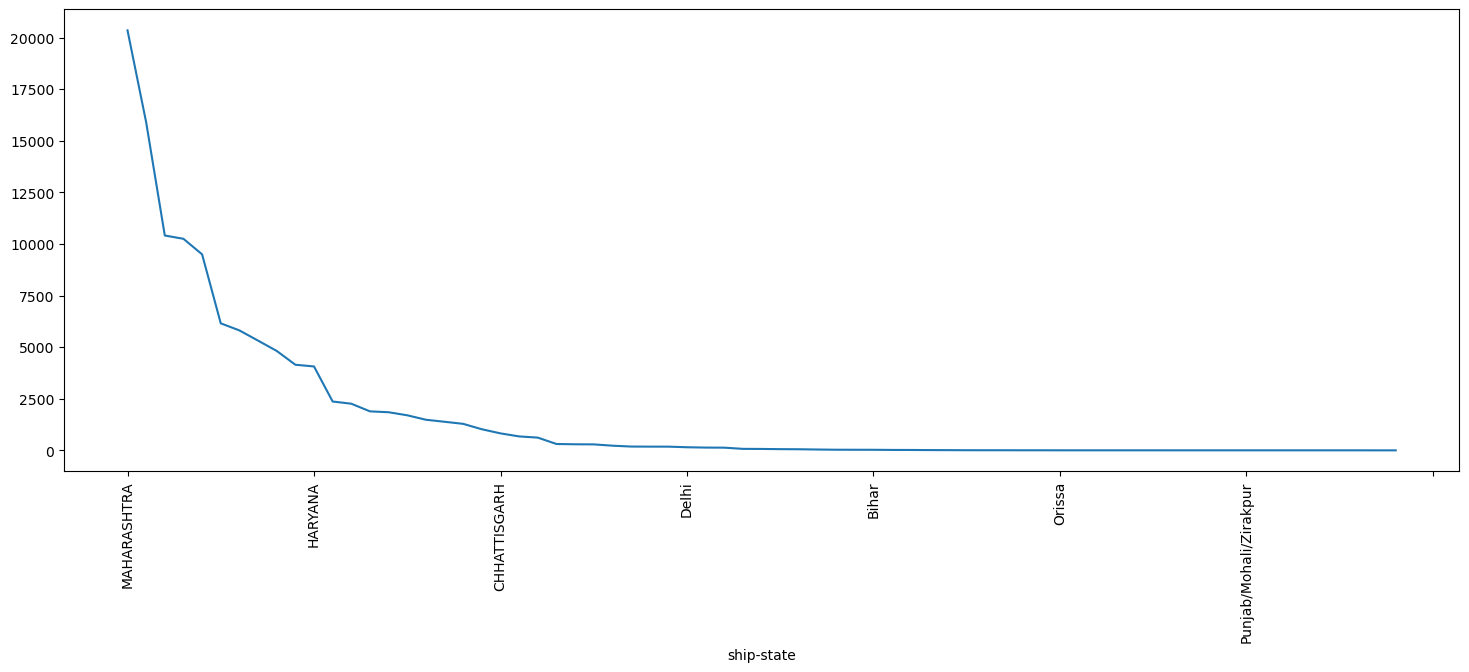

In [182]:
#How does the order volume vary by region (e.g., state or city)? 
order_volume = df.groupby(['ship-state'])['Qty'].sum().sort_values(ascending = False) 
order_volume.plot(kind = 'line', figsize = (18, 6), rot = 90) 


<Axes: xlabel='ship-state,Status'>

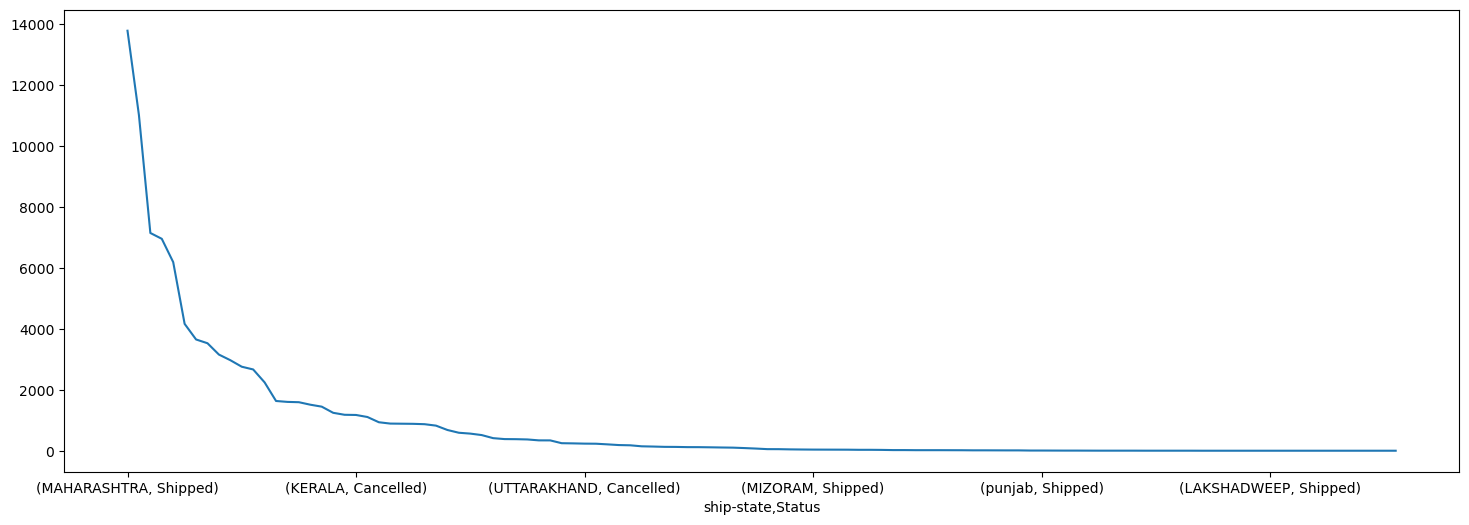

In [183]:
#Are there any significant trends in shipping based on location (e.g., higher cancellations in specific areas)? 
trends_df = df[(df['Status'] == 'Shipped') | (df['Status'] == 'Cancelled')]
trends_df.groupby(['ship-state', 'Status'])['Status'].count().sort_values(ascending = False).plot(kind = 'line', figsize = (18, 6))